# Single Cell Sequencing: data analysis II function (campari information)

Here we use information from function and campari to check our clustering.


In [1]:
!pip install --quiet anndata
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import os 
#doublet detection
import scrublet as scr
#batch correction (not installed by default in the docker container, install via command line: pip install scanorama bbknn)
import scanorama as scan
#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb
import sys 
sb.set_context(context='poster')
from matplotlib import rcParams
import config as general_paths
from datetime import date
today = date.today()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

ModuleNotFoundError: No module named 'scrublet'

In [ ]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
input_path = output_path
local_path = general_paths.local_path

## SECTION I: Data loading

Loading adata information that has been agregated and quality controled

In [72]:
adata = ad.read_h5ad(os.path.join(input_path ,'campari_scs_umap.h5ad'))
adata.shape

/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(1688, 14998)

## SECTION II: Funtional exploration

Now we add the information we have about stimuli for each cell and level of campari green and red fluorecence. 

Here we define the stimuli that were used (this assignation of number and id is the one that is used in the plate information excel sheet): 


* 0: control
* 1: pinch
* 2: new_stroke (after december)
* 3: ballon
* 4: AG (ano-genital brush)
* 5: AD (anal distension)
* 6: heating
* 7: mock
* 8: old_stoke (first experiments with stroke)
* 9: anal pinch
* 10: mock with poop
* 11 : vaginal distansion
* 12: tomatoe
* 13: poop
* 14: Bladder
* 15: Colon-rectum distension (CRD)
* 16: AD + CFA (anal distension + inflamation)
* 17: AGB + CFA (ano-genital brush + inflamation)
* 18: Heating + CFA (heating + inflamation)
* 19: Tail Brush
* 20: TRPM8 td Tomatoe




In [73]:
rcParams['figure.figsize']=(4,4)


labels=['Control','Pinch','New_stroke','Ballon','AG','AD','Heating','Mock','Old_stroke','Anal_pinch','Mock_w_poop','Vaginal_distension','Tomato','Poop', 
        'Bladder','CRD','AD+CFA','AGB+CFA','Heating+CFA','Tail Brush','TRPM8 td tomato',
        'AD + Pulse', 'AGB+CFA 1 W','AD+CFA 1W','HP','Penis','Clitoris Vibration','Max Cells',
        'Tracing Ano Genital Skin injection','Crazy Mock','Tracing Anal injection', 'Tracing Vagina',
       'Brush_BlinkTest','TracingC','TracingB','TracingBC','NEFH','empty']

color = ['gainsboro','green','darkorange','purple','magenta','cyan','red',
         'orange','yellow','brown','orange','blue','violet','k',
        'bisque','lightcoral','chocolate','turquoise','fuchsia','greenyellow','darkred']

symbol = ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','^','^','^','x','d']

we_want = ['Control','AD','AG','AD+CFA','AGB+CFA']
symbol = ['o','x','x','^','^']
color=['gainsboro','green','red','green','red']


### create and exportable varable list of genes names
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])
### transform adata sparse matrix to scipy
x = adata.X
### create exportable arrays with information about stimuli, fluorecence, and louvain transformations
stim = np.zeros((x.shape[0],))
red = np.zeros((x.shape[0],))
green = np.zeros((x.shape[0],))
for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    red[i] = adata.obs['red'][i]
    green[i] = adata.obs['green'][i]


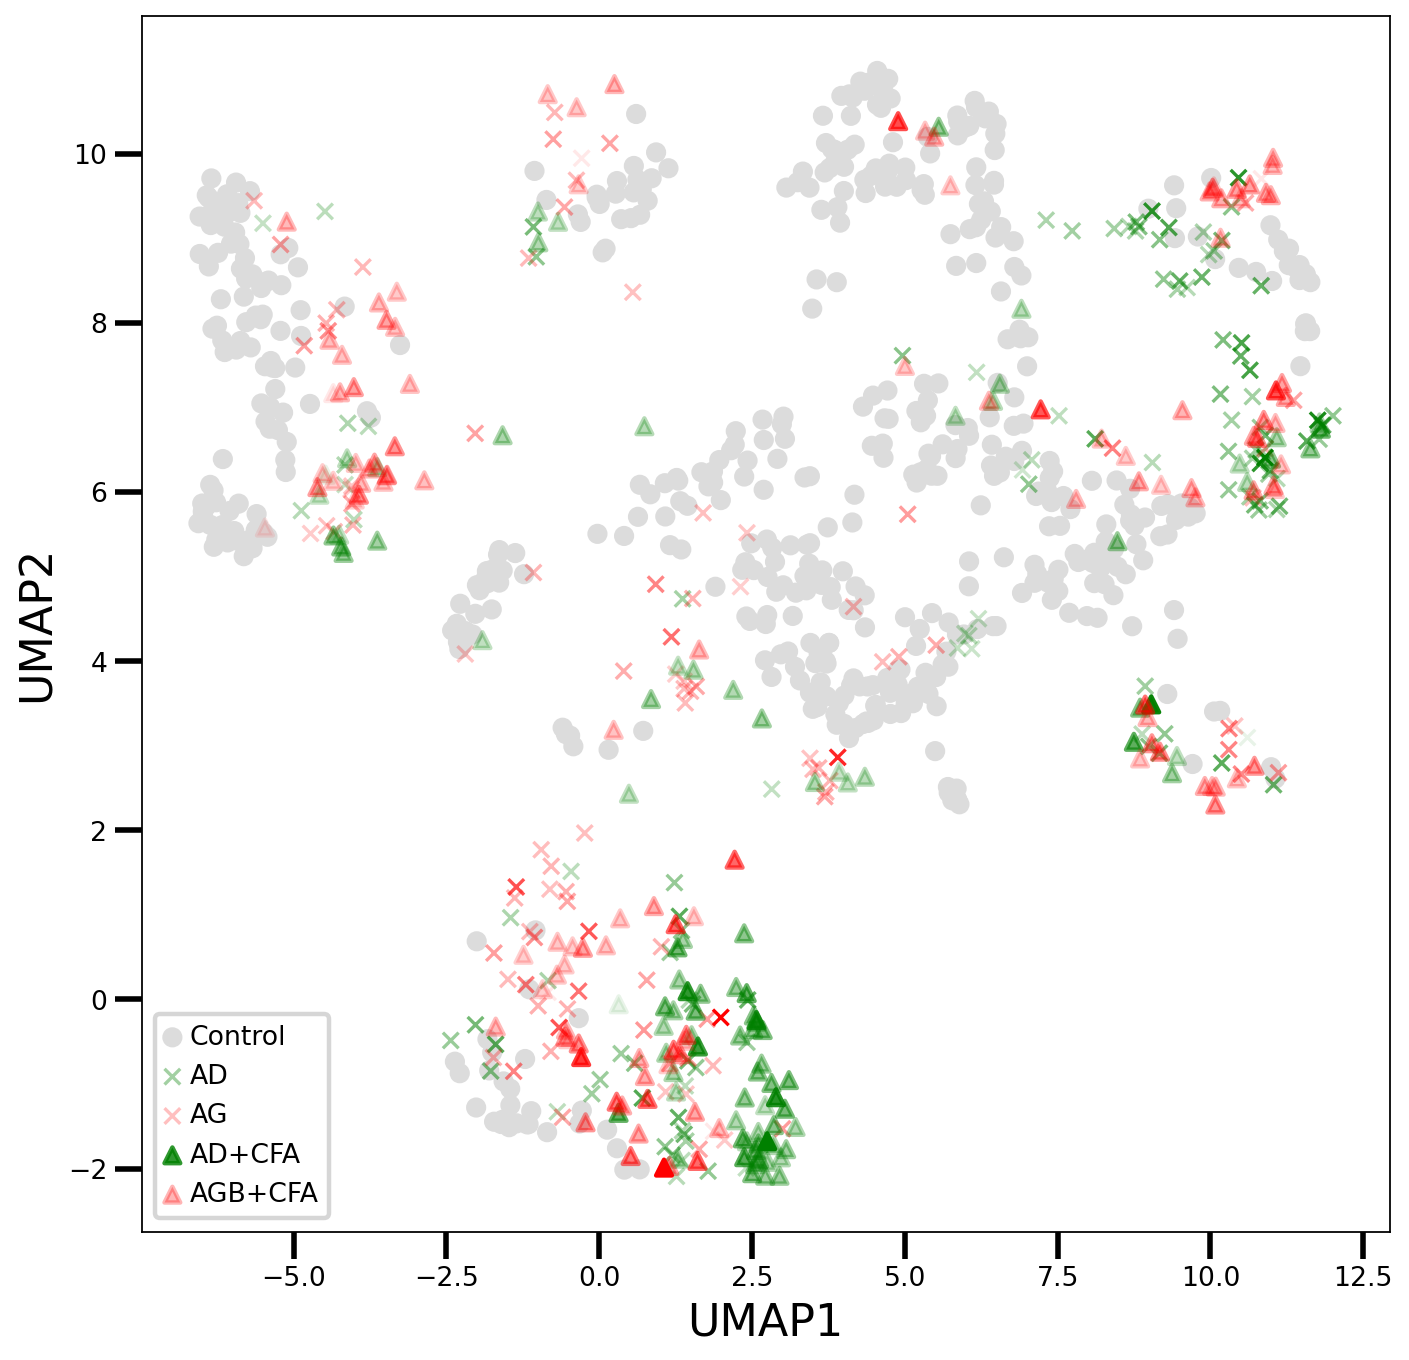

In [74]:
### plotting all stimulus together

figure, axes = plt.subplots()
#red_norm = (red - np.min(red)) / (np.max(red) - np.min(red))
count = 0
for i in range(len(labels)):
    if labels[i] in we_want :
        index = np.where(stim == i)[0]
        x = np.nan_to_num(red[index],nan=0.0, posinf=None, neginf=None)
        red_norm = (x - np.min(x) + sys.float_info.epsilon) / (np.max(x) - np.min(x) + sys.float_info.epsilon)
        red_norm = (red_norm + 0.1)/1.1
        axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 50, c = color[count], marker = symbol[count],alpha = red_norm)
        count= count+1
axes.grid(visible = 'None')
#axes.set_xlim([0,19])
#axes.set_ylim([0,19])
axes.set_xlabel('UMAP1', fontsize = 20)
axes.set_ylabel('UMAP2', fontsize = 20)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.tick_params(axis='both', which='minor', labelsize=12)
axes.grid(False)

axes.legend(we_want, fontsize = 12)
#sc.pl.umap(adata, color = 'stimulus', color_map = 'Set1', save = 'stimulus'+ '.png', size = 180)
figure.set_size_inches([10,10])
figure.savefig(os.path.join(figure_path , 'stimulus.png'))

(671, 14998)


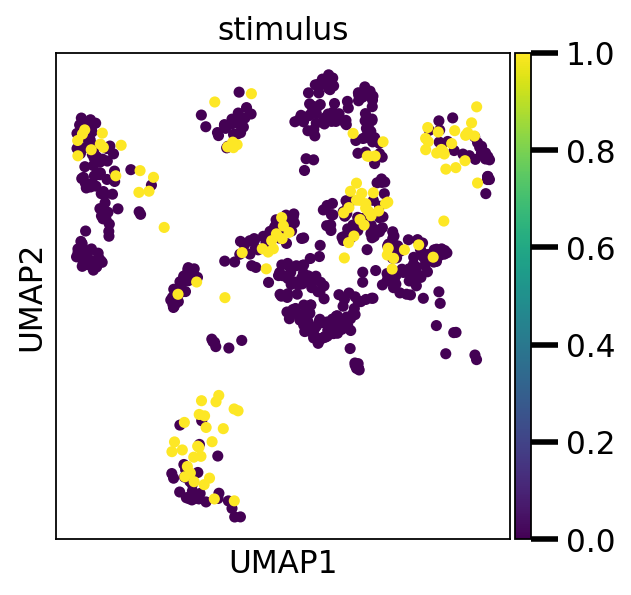

(671, 14998)


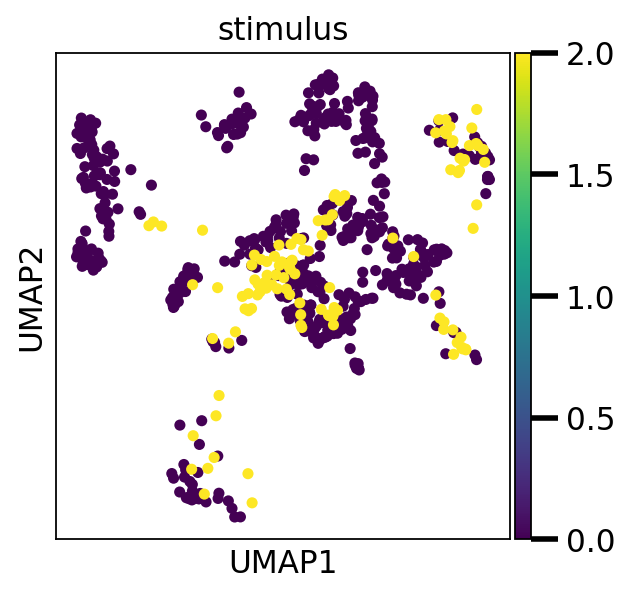

(564, 14998)


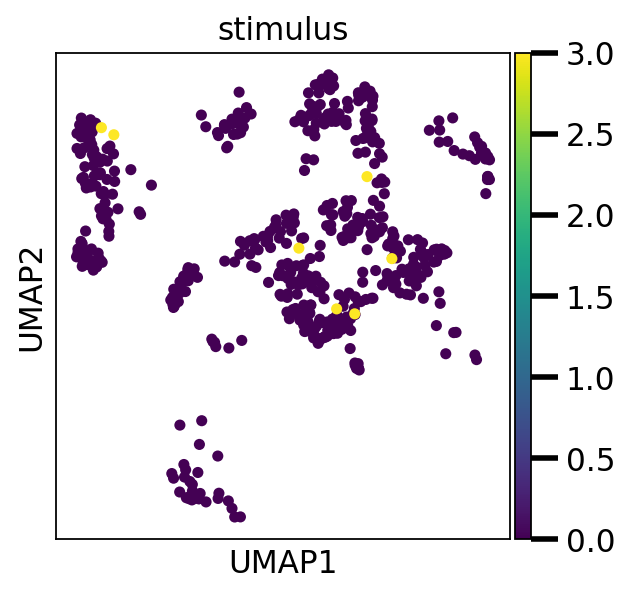

(677, 14998)


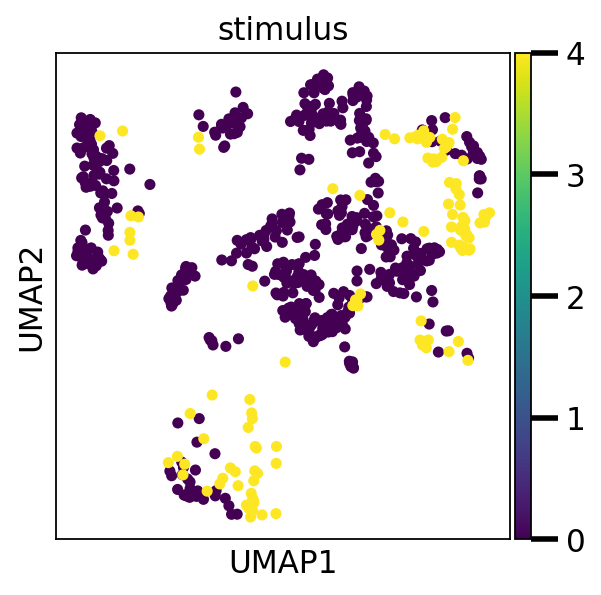

(655, 14998)


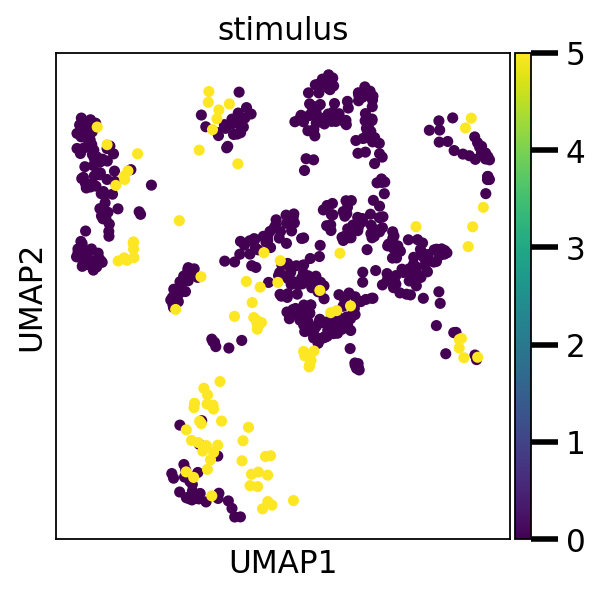

(640, 14998)


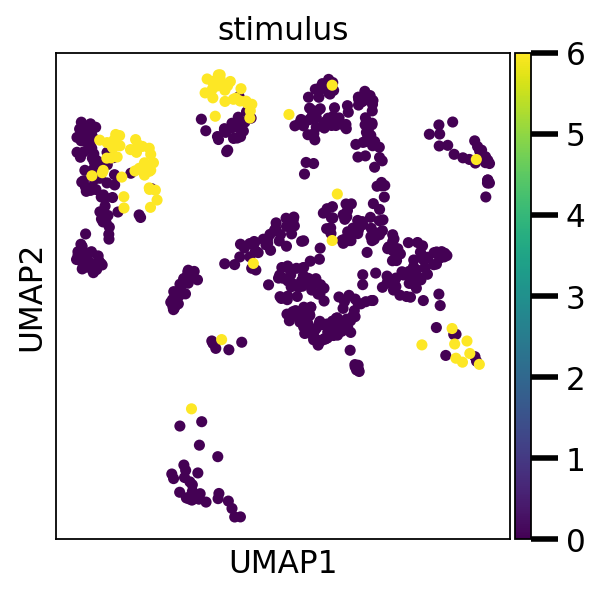

(571, 14998)


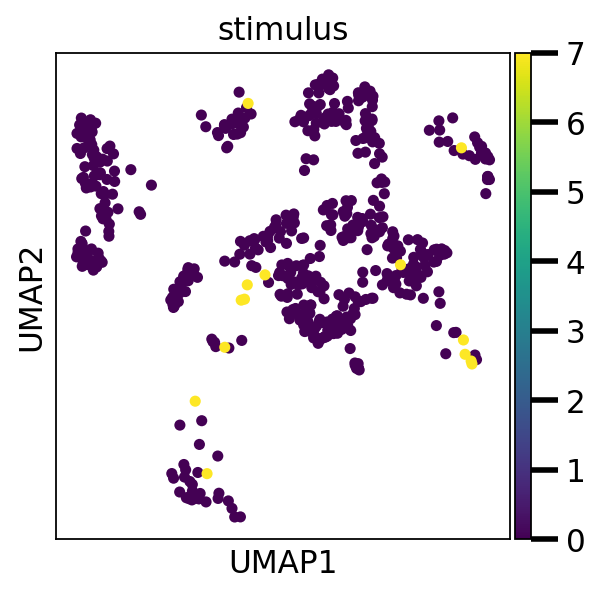

(606, 14998)


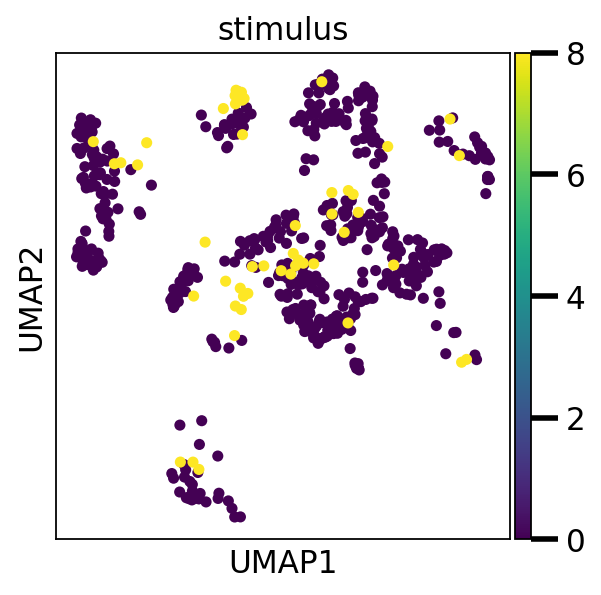

(587, 14998)


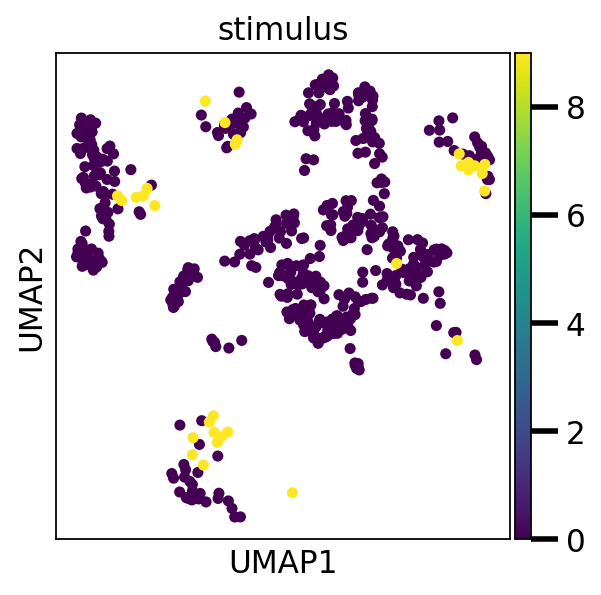

(561, 14998)


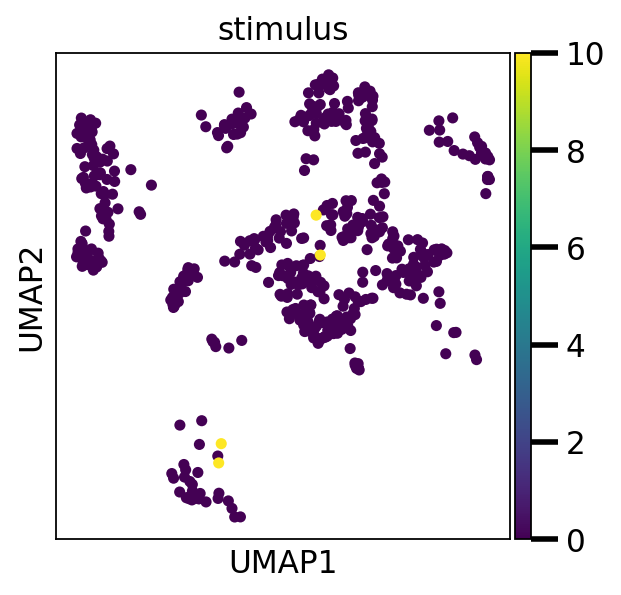

(602, 14998)


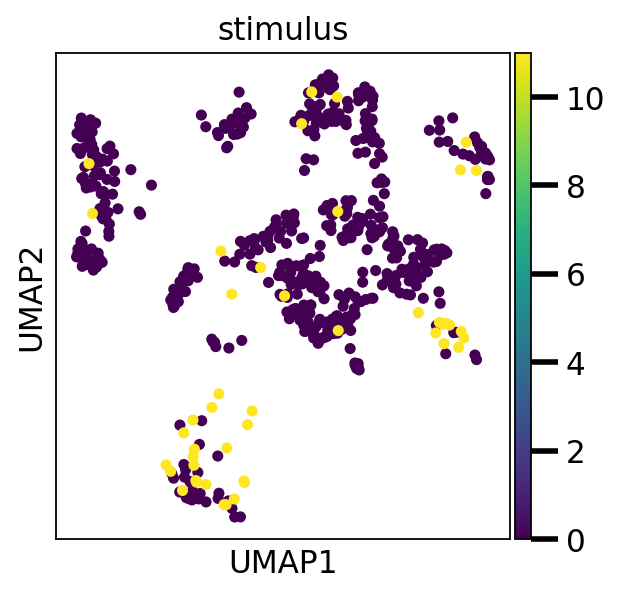

(578, 14998)


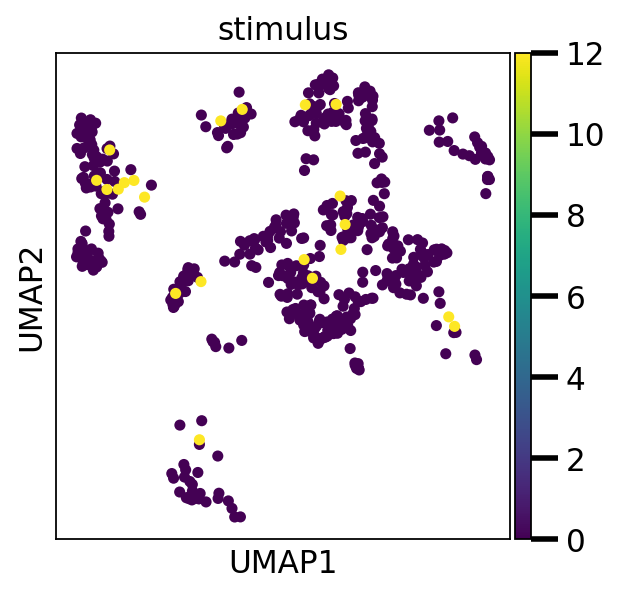

(558, 14998)


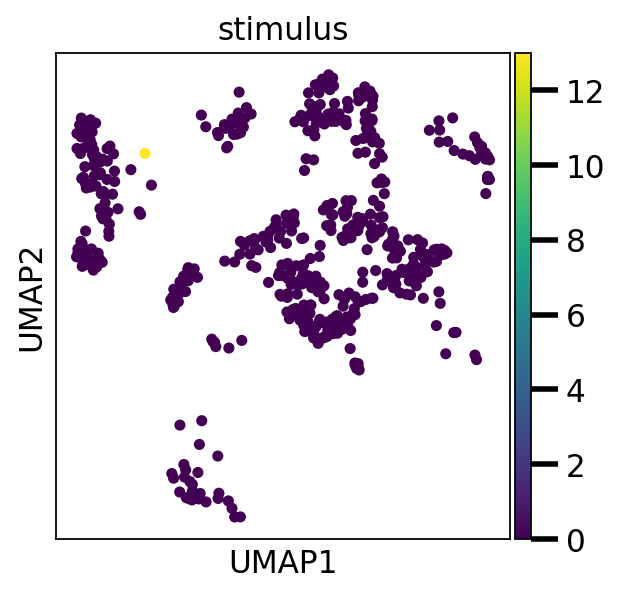

(567, 14998)


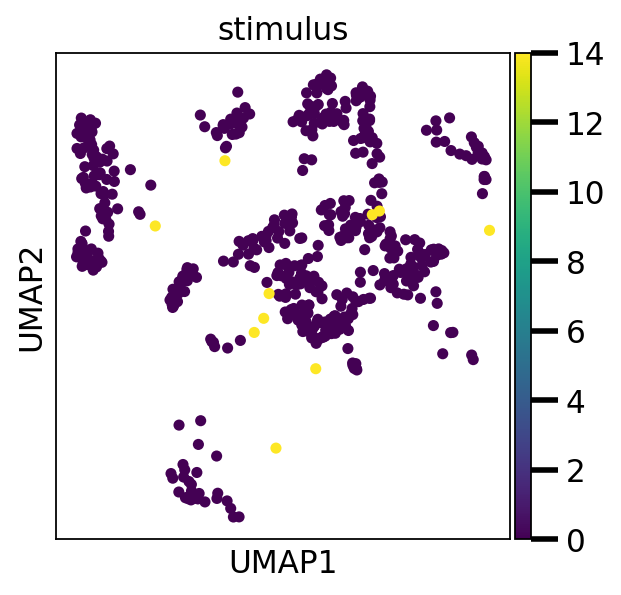

(560, 14998)


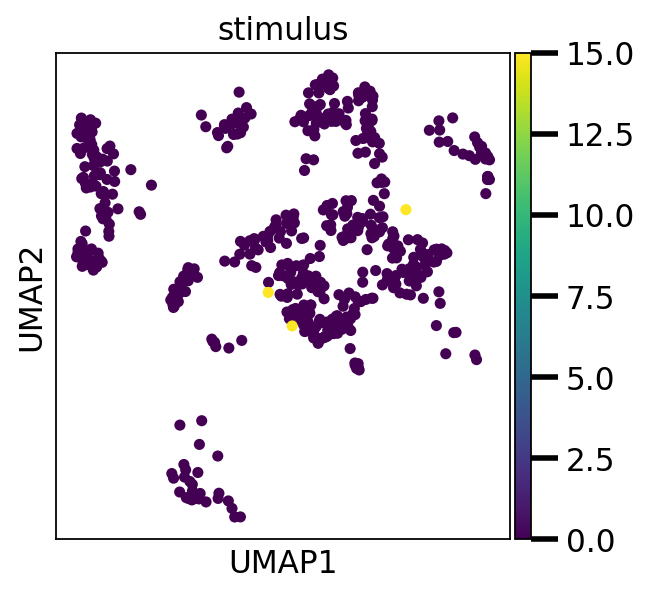

(654, 14998)


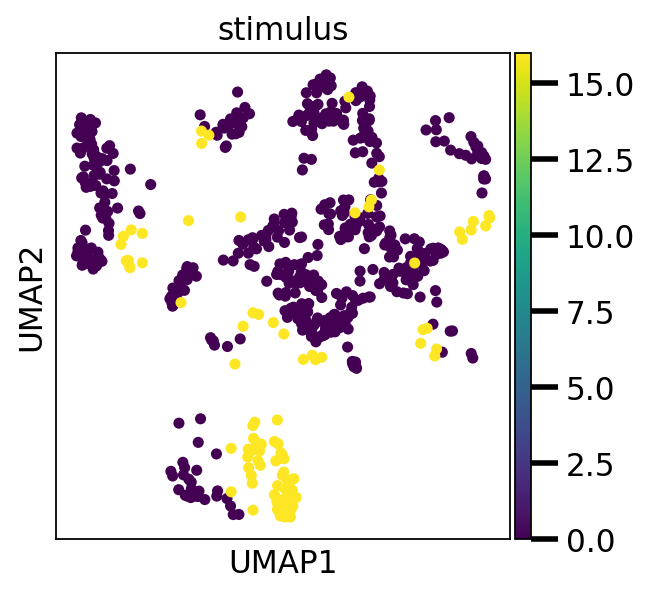

(675, 14998)


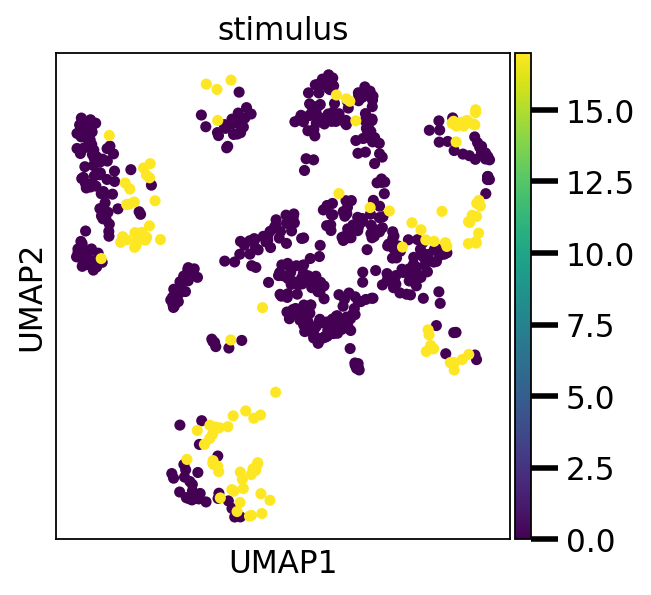

(637, 14998)


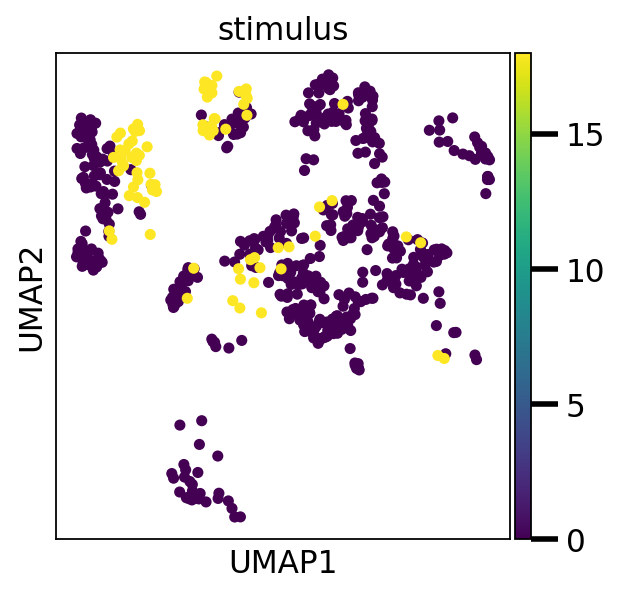

(600, 14998)


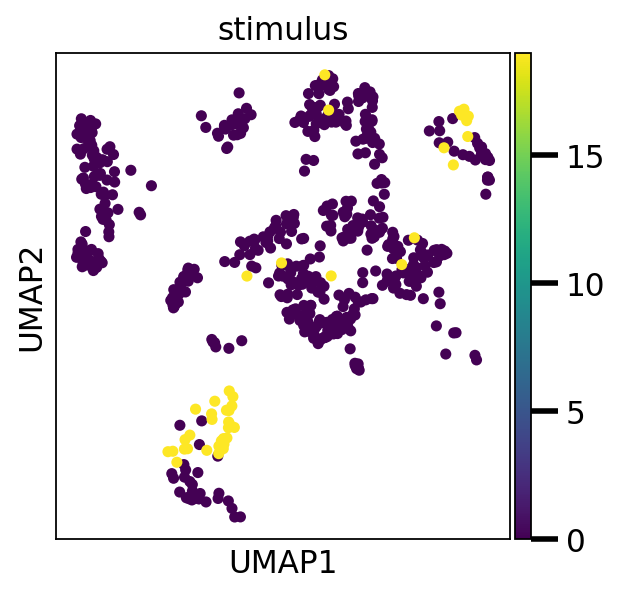

(637, 14998)


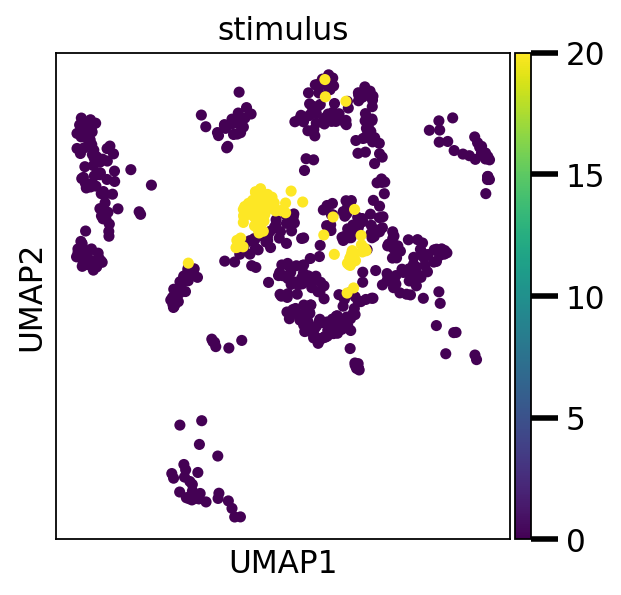

In [75]:
### plotting stimuli individualy

rcParams['figure.figsize']=(4,4)

for i in range(1,len(labels)):
    index = np.logical_or(adata.obs['stimulus'] == i ,adata.obs['stimulus'] == 0)
    aux_adata = adata[index,:]
    print(aux_adata.shape)
    sc.pl.umap(aux_adata, color = 'stimulus', color_map = 'viridis', save = 'UMIs/stimulus/stimulus_' + labels[i]+ '.png', size = 100)

0
[]
4
[0]
5
[0, 4]
2
[0, 4, 5]


IndexError: list index out of range

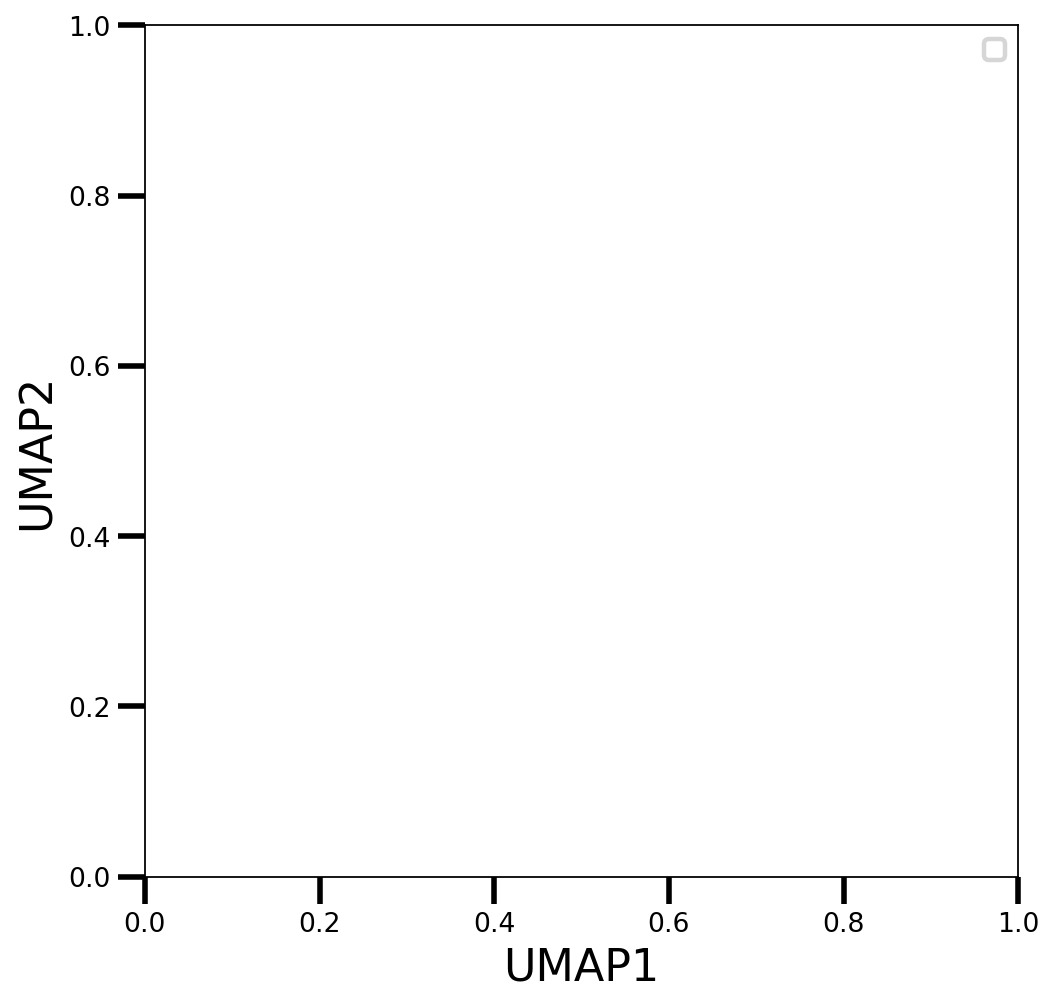

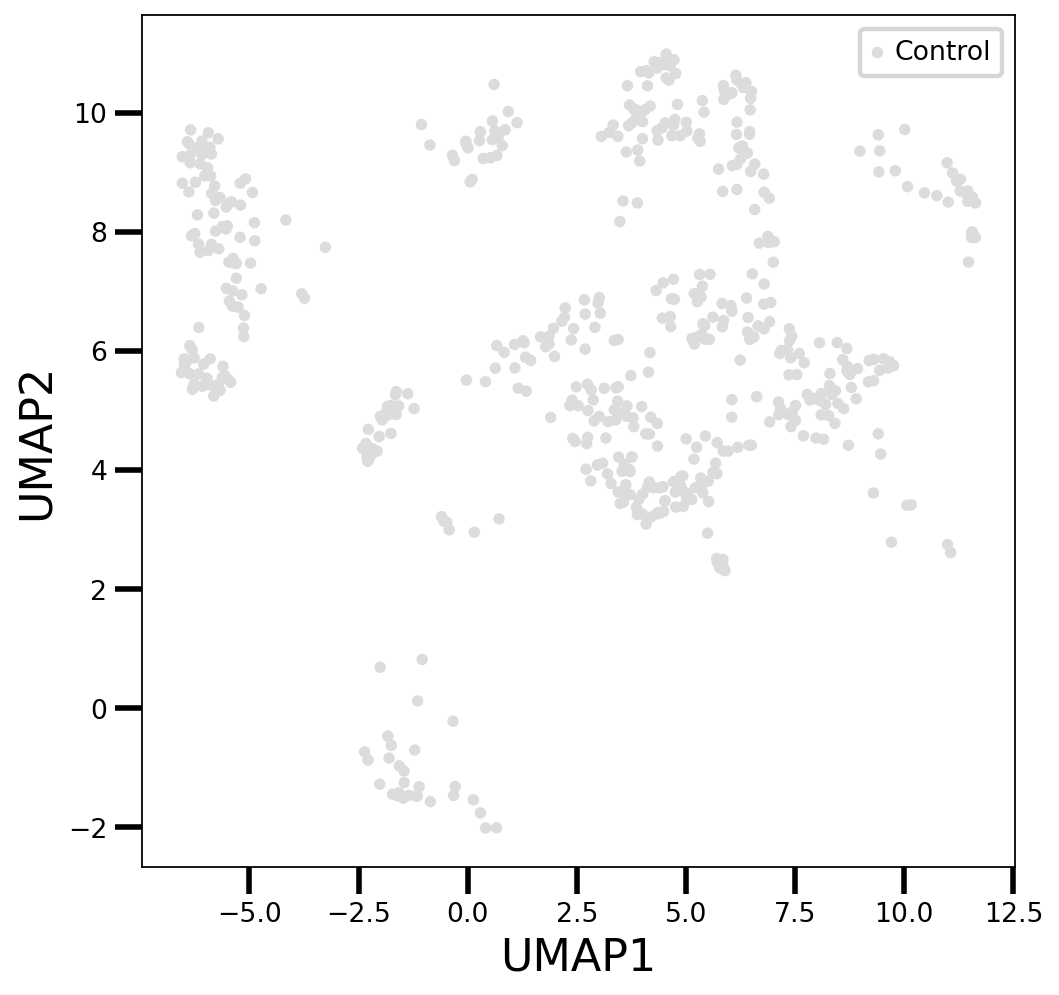

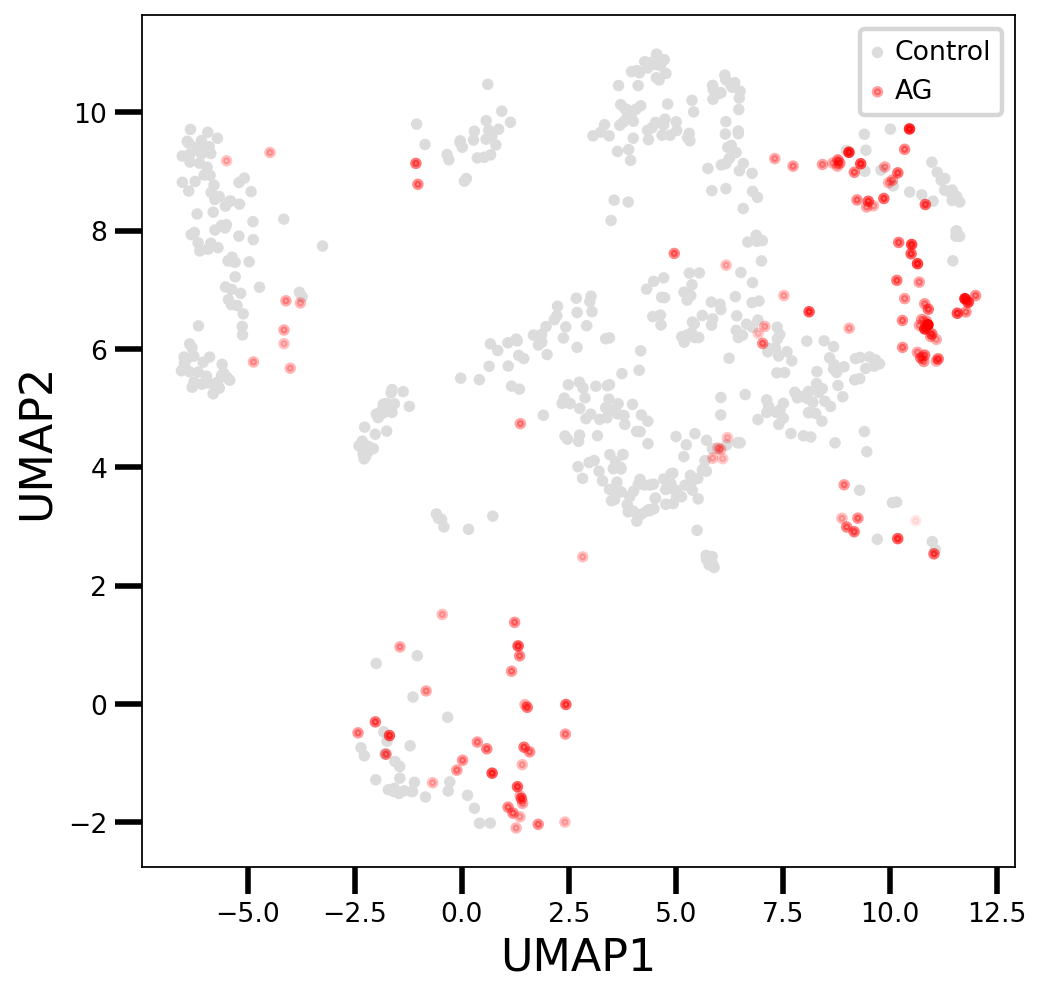

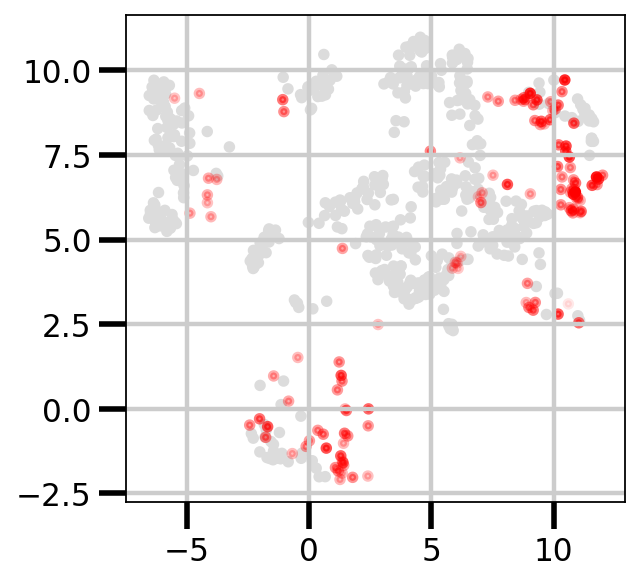

In [76]:
### plotting subsequent stimulus to add individually in a gif (only for selected stimuli)
stimulus_list = [0,4,5,2,1,9,6,11,12]
new_labels=['Control','AG','AD','new_stroke','pinch','anal_pinch','heating','vaginal_distension','non']
count = 0
for i in stimulus_list:
    print(i)
    figure, axes = plt.subplots()
    sublist = stimulus_list[0:count]
    print(sublist)
    for j in sublist:
        index = np.where(stim == j)[0]
        x = np.nan_to_num(red[index],nan=0.0, posinf=None, neginf=None)
        red_norm = (x - np.min(x) + sys.float_info.epsilon) / (np.max(x) - np.min(x) + sys.float_info.epsilon)
        red_norm = (red_norm + 0.1)/1.1
        axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 10, c = color[j],alpha = red_norm)

    axes.grid(visible = 'None')
    #axes.set_xlim([0,22])
    #axes.set_ylim([0,22])
    axes.set_xlabel('UMAP1', fontsize = 20)
    axes.set_ylabel('UMAP2', fontsize = 20)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.tick_params(axis='both', which='minor', labelsize=12)
    axes.grid(False)
    axes.legend(new_labels, fontsize = 12)
    figure.set_size_inches([7,7])
    figure.savefig(figure_path + 'cum_stimulus'+ str(count) +'.png')

    count = count +1 

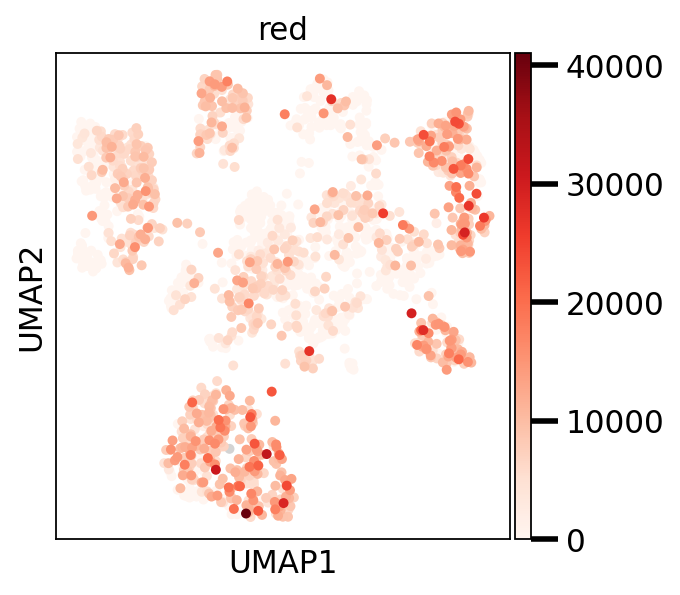

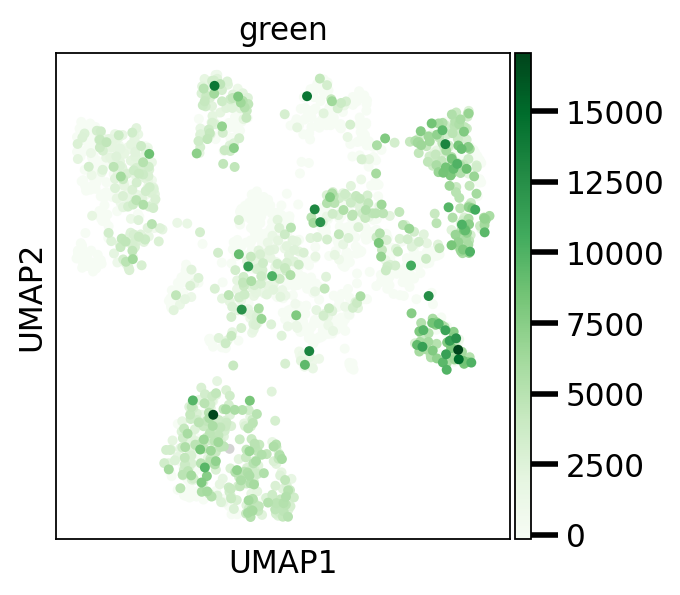

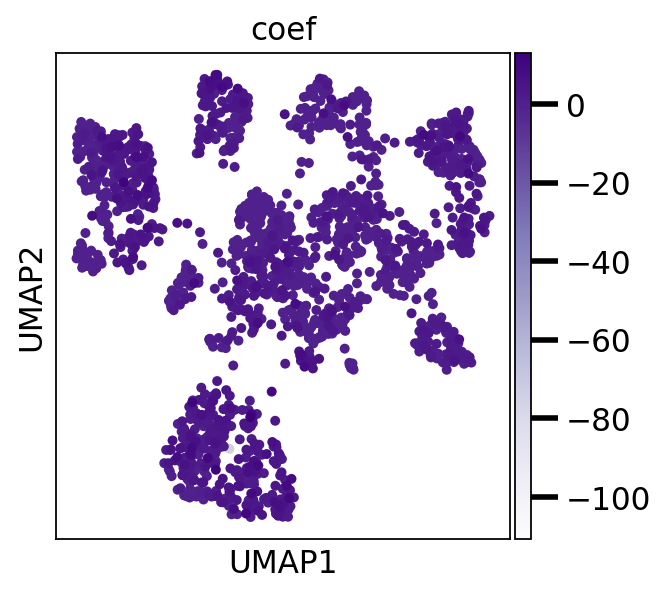

In [77]:
### plotting fluorecence levels 

sc.pl.umap(adata, color='red', color_map = 'Reds', save = 'UMIs/fluorecence/red_f' + '.png', size = 80)
sc.pl.umap(adata, color='green', color_map = 'Greens', save = 'UMIs/fluorecence/green_f' + '.png', size = 80)
adata.obs['coef'] = adata.obs['red']/(adata.obs['green'] + sys.float_info.epsilon)
sc.pl.umap(adata, color='coef', color_map = 'Purples', save = 'UMIs/fluorecence/coef_f' + '.png', size = 80)


1
(671, 14998)


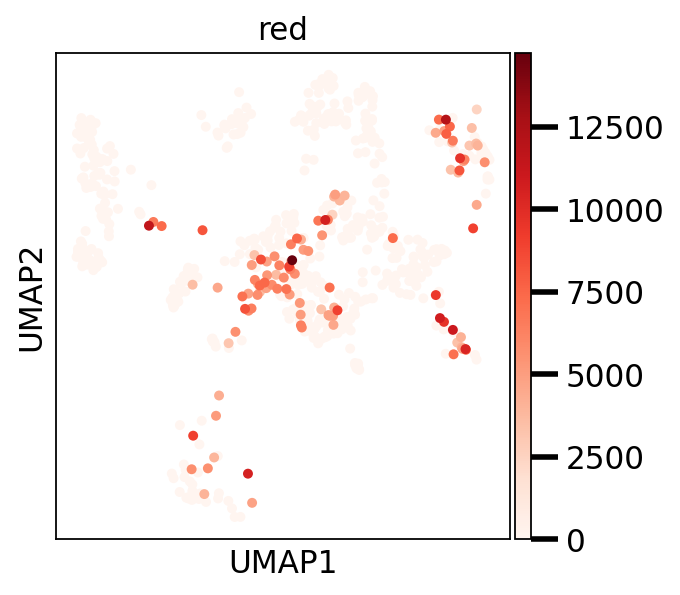

2
(564, 14998)


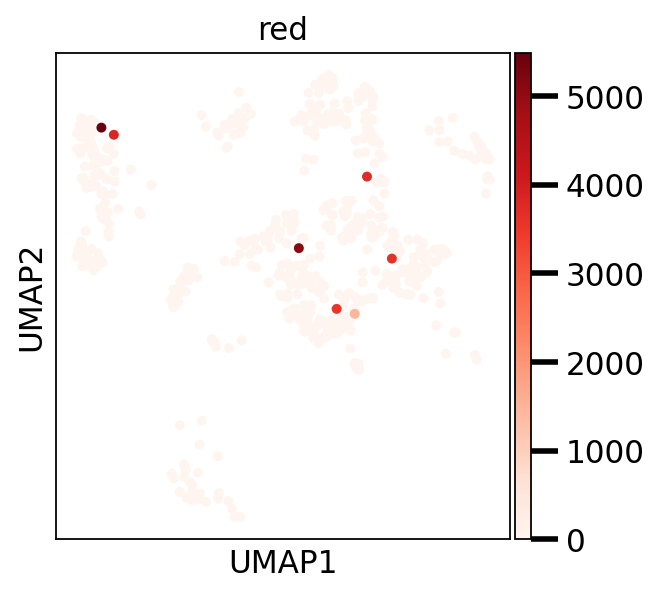

3
(677, 14998)


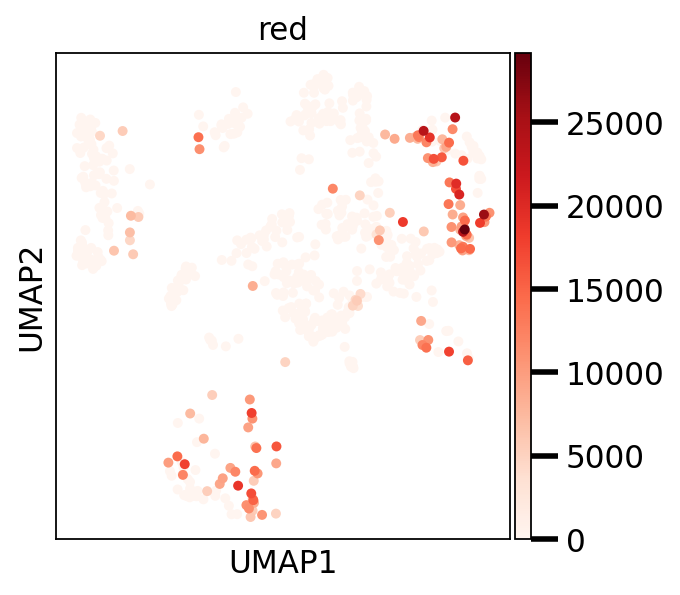

4
(655, 14998)


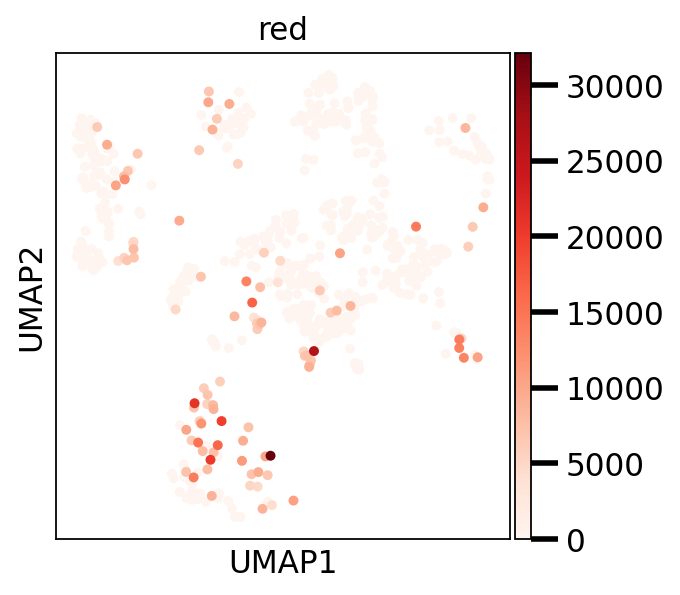

5
(640, 14998)


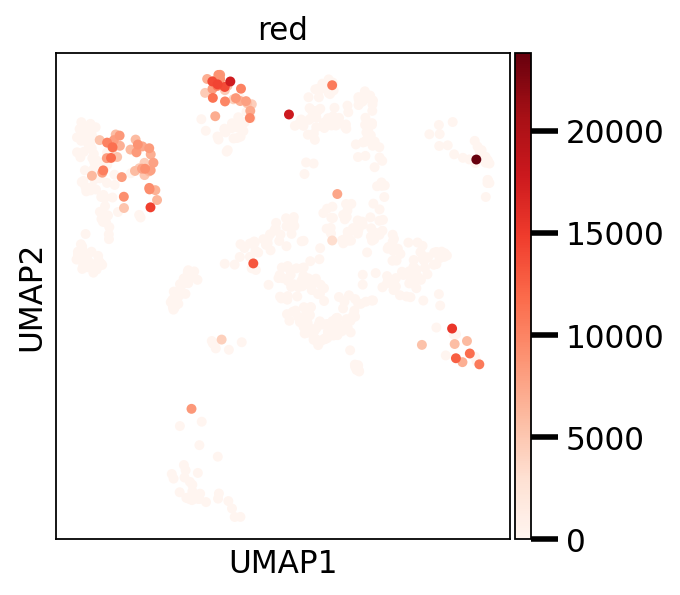

6
(571, 14998)


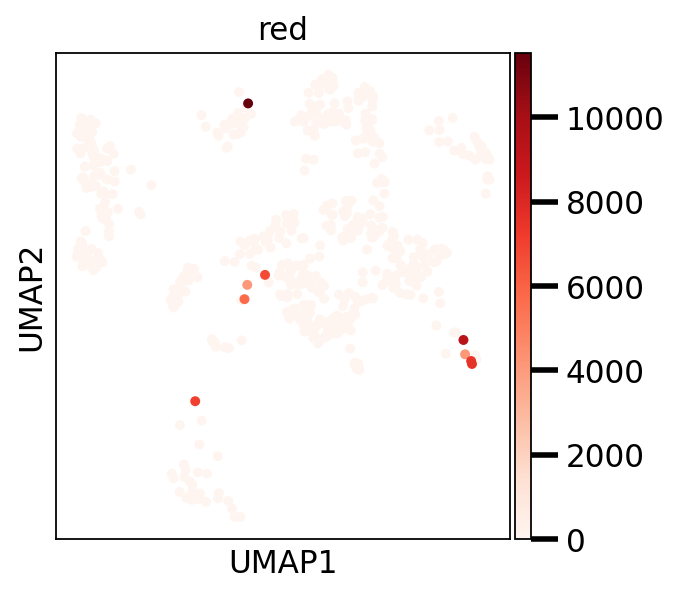

7
(606, 14998)


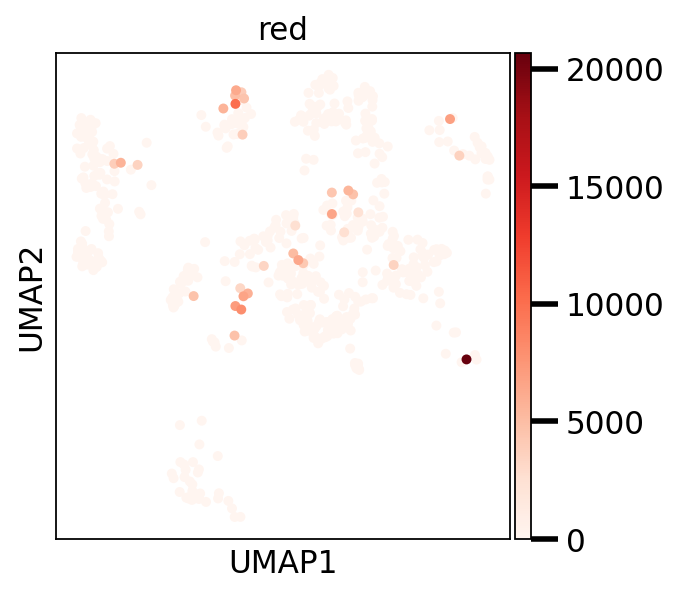

8
(587, 14998)


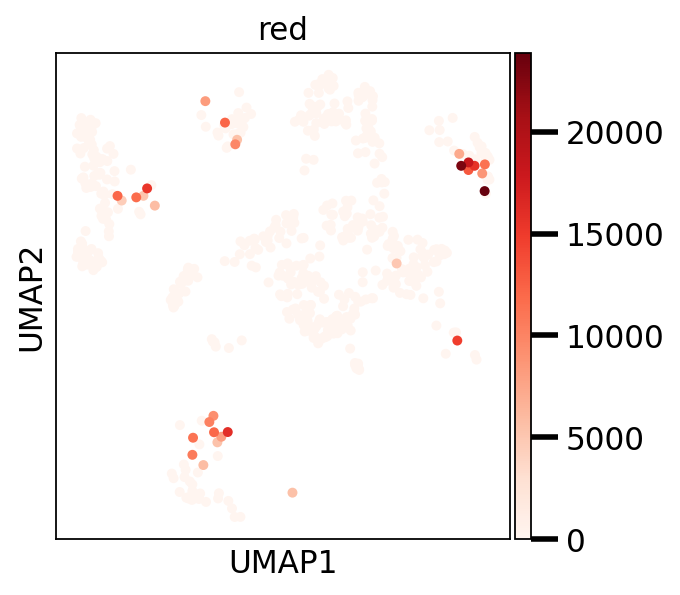

9
(561, 14998)


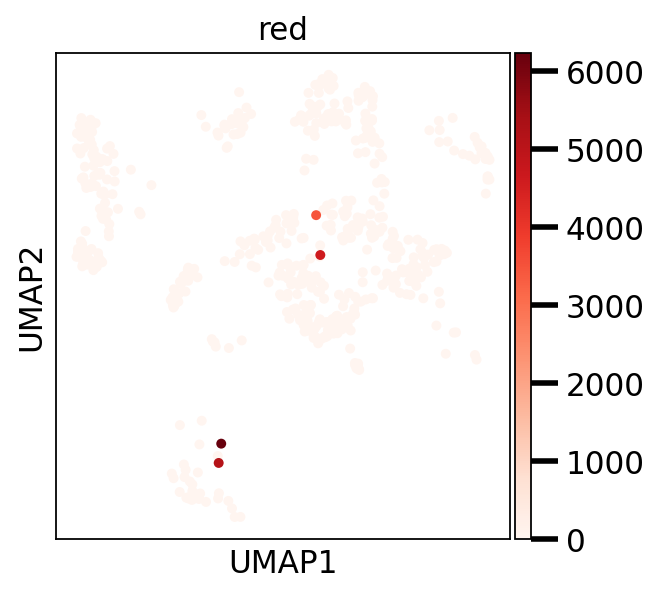

10
(602, 14998)


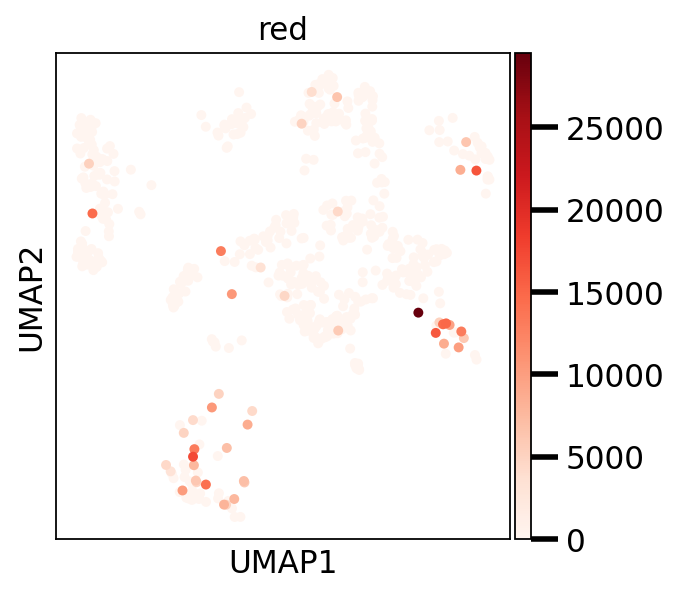

11
(578, 14998)


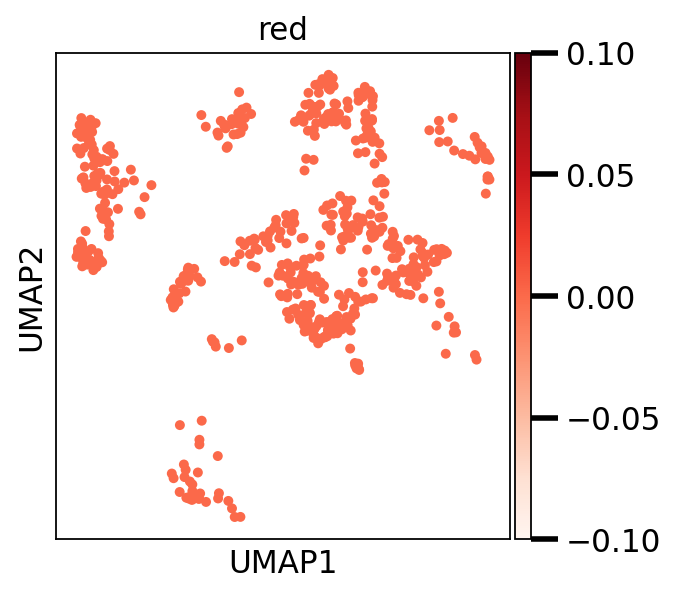

12
(558, 14998)


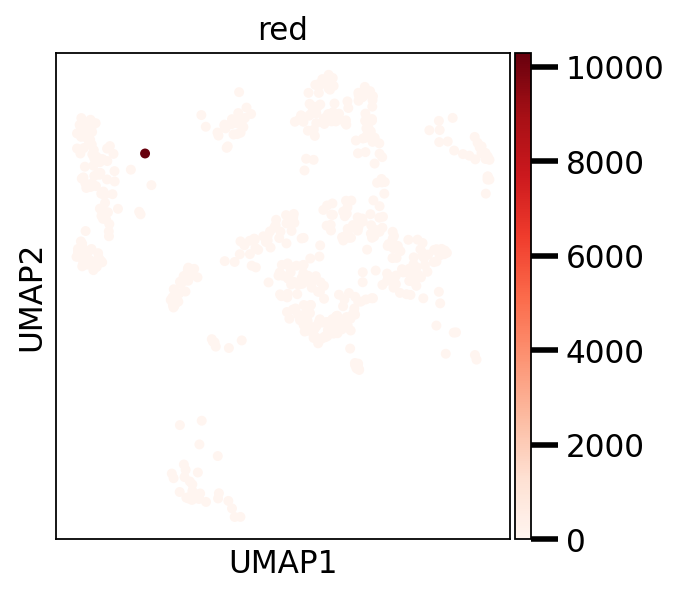

13
(567, 14998)


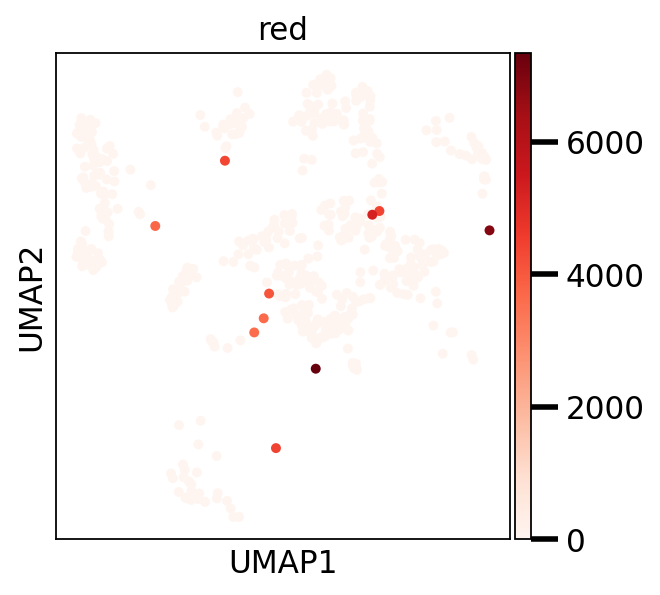

14
(560, 14998)


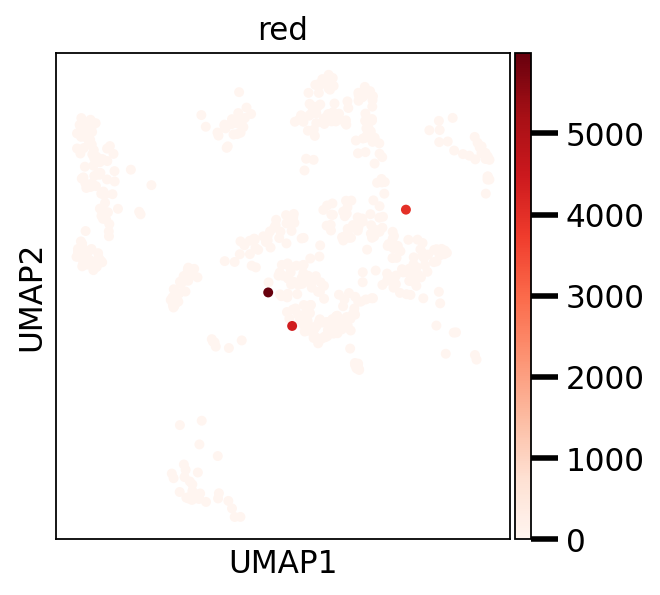

15
(654, 14998)


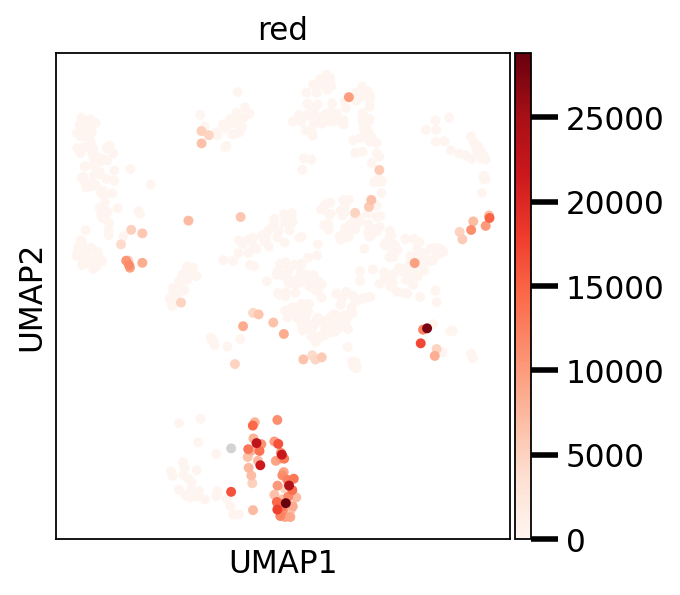

16
(675, 14998)


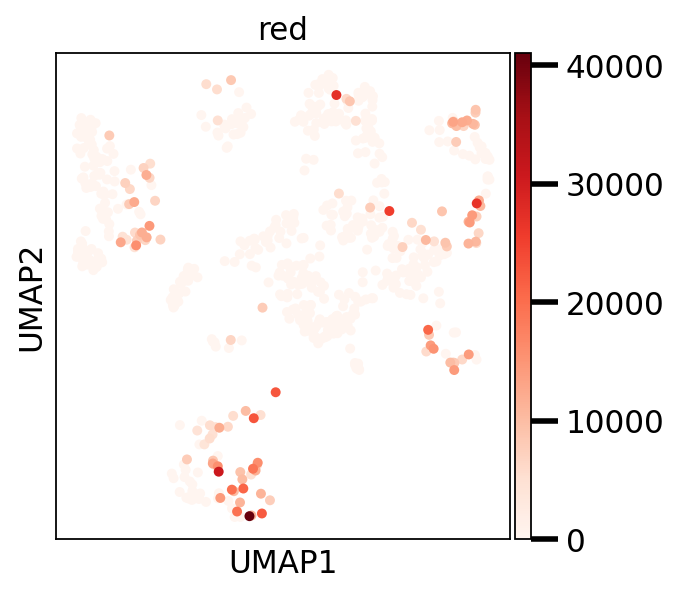

17
(637, 14998)


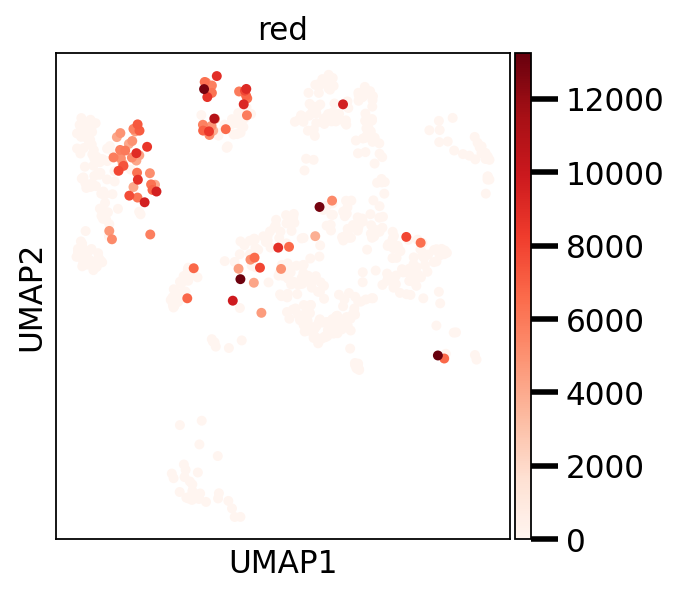

18
(600, 14998)


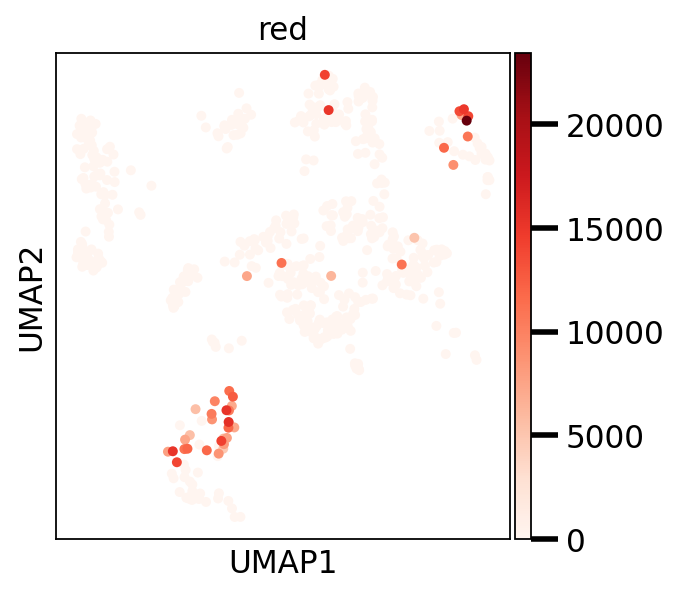

19
(637, 14998)


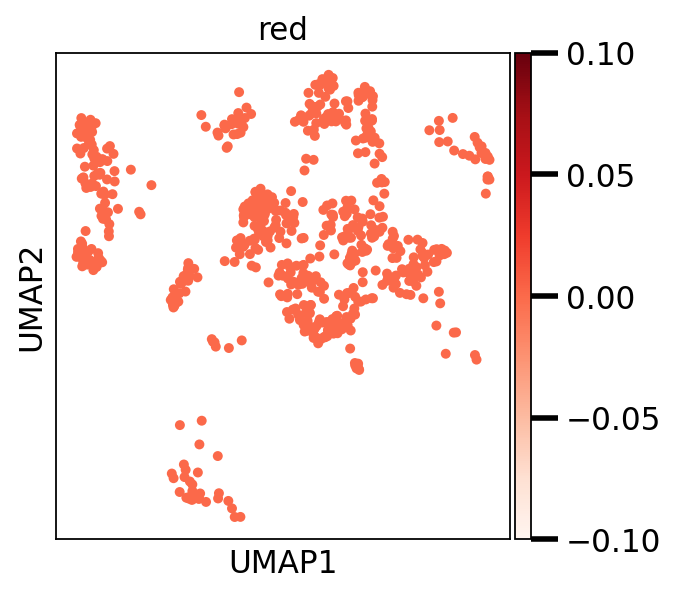

20
(557, 14998)


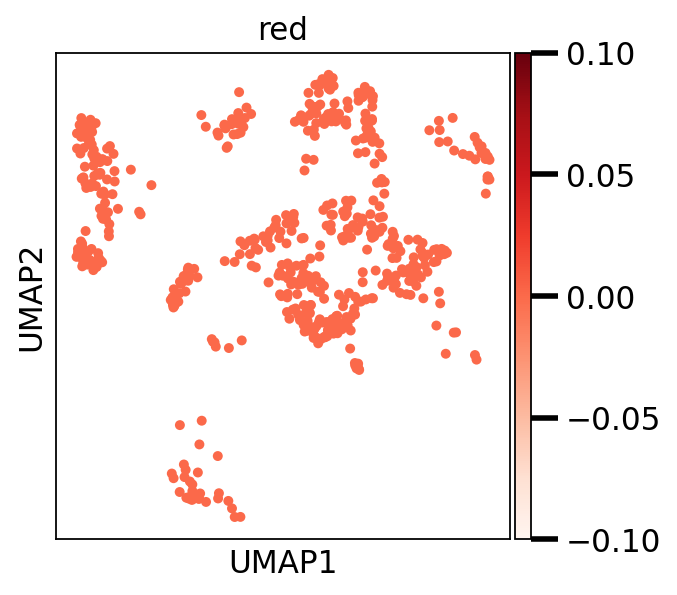

In [78]:
### plotting fluorecence levels stimulus by stimulus
for i in range(1,len(labels)):
    print(i)
    index = np.logical_or(adata.obs['stimulus'] == i+1,adata.obs['stimulus'] == 0)
    aux_adata = adata[index,:]
    print(aux_adata.shape)
    sc.pl.umap(aux_adata, color = 'red', color_map = 'Reds', save = 'UMIs/fluorecence/stimulus_red_' + labels[i]+ '.png', size = 80)


In [79]:
#print(adata.obs['louvain_r2'])
stimulus_variable = adata.obs['louvain_r2']
stimulus_variable.name = 'stimulus_'
print(stimulus_variable)
stimulus_variable.cat.set_categories(['0', '1', '2','3','4','5','6','7','8','9','10','11','12'], rename=True)
print(stimulus_variable)

print(len(stimulus_variable))
for i in range(len(stimulus_variable)):
    stimulus_variable.iloc[i] = str(adata.obs['stimulus'][i])
    
print(stimulus_variable)
adata.obs['stimulus_'] = stimulus_variable

sc.tl.rank_genes_groups(adata, 'stimulus_', method='wilcoxon')
rank_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

barcode
TCCGATAACTCACTAACCGG-sample1-sample12-sample123-sample1234    11
TCCGATAACTCACAATCCAC-sample1-sample12-sample123-sample1234     8
TTCACCACGGCACAATCCAC-sample1-sample12-sample123-sample1234     8
TTCACCACGGCACTAACCGG-sample1-sample12-sample123-sample1234     8
TTCACCAGCTCACTAACCGG-sample1-sample12-sample123-sample1234    10
                                                              ..
TTGGATACCTCCGGAGACAT-sample5                                   9
ACCTTACGTGCCGCAGTAGT-sample5                                   0
TTGAGTAGGTACCTAGGAGG-sample5                                   7
TTGAGTAGGTTTCACCTGTG-sample5                                   1
TTGCACTTGTTTGGTTCCAA-sample5                                   8
Name: stimulus_, Length: 1688, dtype: category
Categories (16, object): ['0', '1', '2', '3', ..., '12', '13', '14', '15']
barcode
TCCGATAACTCACTAACCGG-sample1-sample12-sample123-sample1234    11
TCCGATAACTCACAATCCAC-sample1-sample12-sample123-sample1234     8
TTCACCACGGCACAATC

TypeError: Cannot setitem on a Categorical with a new category (1.0), set the categories first

In [ ]:

labels=['Control','pinch','new_stroke','ballon','AG','AD','heating','mock',
        'old_stroke','anal_pinch','mock_w_poop','vaginal_distension','tomatoe','poop',
       'bladder','colon-rectum_dist','AD+CFA','AGB+CFA','heating+CFA','Tail Brush','TRPM8tdTOM']

color = ['gainsboro','green','darkorange','purple','magenta','cyan','red',
         'orange','yellow','brown','orange','blue','violet','k',
        'bisque','lightcoral','chocolate','turquoise','fuchsia','greenyellow','darkred']
symbol = ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','^','^','^','x','d']

figure, axes = plt.subplots()
index = np.where(stim != 20)[0]
x = np.nan_to_num(red[index],nan=0.0, posinf=None, neginf=None)
red_norm = (x - np.min(x) + sys.float_info.epsilon) / (np.max(x) - np.min(x) + sys.float_info.epsilon)
red_norm = (red_norm + 0.1)/1.1
axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 50, c = color[0], marker = symbol[count],alpha = red_norm)

index = np.where(stim == 20)[0]
x = np.nan_to_num(red[index],nan=0.0, posinf=None, neginf=None)
red_norm = (x - np.min(x) + sys.float_info.epsilon) / (np.max(x) - np.min(x) + sys.float_info.epsilon)
red_norm = (red_norm + 0.1)/1.1
axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 10, c = color[20], marker = symbol[20],alpha = 0.3)


axes.grid(visible = 'None')
axes.set_xlim([0,19])
axes.set_ylim([-5,15])
axes.set_xlabel('UMAP1', fontsize = 20)
axes.set_ylabel('UMAP2', fontsize = 20)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.tick_params(axis='both', which='minor', labelsize=12)
axes.grid(False)

axes.legend(['All cells', 'TRPM8tdTOM'], fontsize = 12)
#sc.pl.umap(adata, color = 'stimulus', color_map = 'Set1', save = 'stimulus'+ '.png', size = 180)
figure.set_size_inches([5,5])
figure.savefig(os.path.join(figure_path , 'TRPM8tdTOM.png'))